In [1]:
from tensorflow import keras

from tensorflow.keras.preprocessing import image as image_module

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import pyplot

%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, recall_score, precision_score, confusion_matrix, accuracy_score

from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.utils import to_categorical
import numpy as np
from keras import Sequential
from keras.optimizers import adam_v2
from keras.layers import *
from pathlib import Path
from tensorflow.keras.optimizers import Adam
from keras import metrics

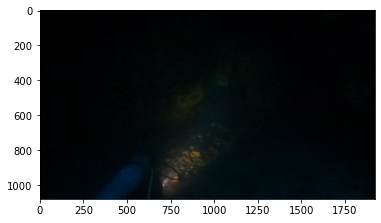

In [2]:
image_location = './dive_video_frames/data/bad/0133_frame690.jpg'

image = mpimg.imread(image_location)

pyplot.imshow(image);

In [3]:
image = image_module.load_img(image_location, target_size=(224, 224))

# Convert image to usable matrix
x = image_module.img_to_array(image)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

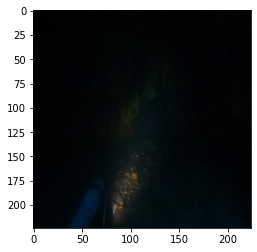

In [4]:
image_unshaped = image_module.load_img(image_location)
pyplot.imshow(image)

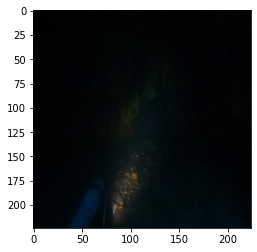

In [5]:
pyplot.imshow(image);

In [100]:
p_bad = Path('./dive_video_frames/data/bad').glob('**/*.jpg')
p_good = Path('./dive_video_frames/data/good').glob('**/*.jpg')

p_bad_test = Path('./dive_video_frames/data/bad_test').glob('**/*.jpg')
p_good_test = Path('./dive_video_frames/data/good_test').glob('**/*.jpg')

In [101]:
images_train = []
img_list_train = []
target_list_train = []

images_test = []
img_list_test = []
target_list_test = []


for image_location in p_bad:
    image = image_module.load_img(image_location, target_size=(224, 224))
    x = image_module.img_to_array(image)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    img_list_train.append(x)
    target_list_train.append(0)
    images_train.append(image)

for image_location in p_good:
    image = image_module.load_img(image_location, target_size=(224, 224))
    x = image_module.img_to_array(image)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    img_list_train.append(x)
    target_list_train.append(1)
    images_train.append(image)
    
for image_location in p_bad_test:
    image = image_module.load_img(image_location, target_size=(224, 224))
    x = image_module.img_to_array(image)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    img_list_test.append(x)
    target_list_test.append(0)
    images_test.append(image)

for image_location in p_good_test:
    image = image_module.load_img(image_location, target_size=(224, 224))
    x = image_module.img_to_array(image)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    img_list_test.append(x)
    target_list_test.append(1)
    images_test.append(image)

In [140]:
print(len(img_list_train))
print(len(img_list_test))
print(len(target_list_train))
print(len(target_list_test))
print(len(images_train))
print(len(images_test))

2032
226
2032
226
2032
226


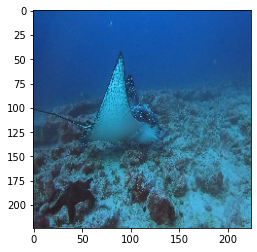

In [103]:
pyplot.imshow(images_train[1501]);

In [104]:
X_train, y_train, z_train = img_list_train, target_list_train, images_train
X_test, y_test, z_test = img_list_test, target_list_test, images_test

In [105]:
X_train = np.array(X_train).reshape((-1,224,224,3))
X_test = np.array(X_test).reshape((-1,224,224,3))
# y_train = np.array(y_train).reshape(-1,1)
# y_test = np.array(y_test).reshape(-1,1)

In [62]:
# y_train

In [282]:
# y_train = to_categorical(y_train)
# y_test = to_categorical(y_test)

In [16]:
#base model, simple NN without transfer learning
seq_model = keras.Sequential([
    keras.layers.InputLayer(input_shape=X_train.shape[1:]),
    keras.layers.Flatten(),
    keras.layers.Dense(units=3, activation="relu"),
    keras.layers.Dense(units=3, activation="relu"),
    keras.layers.Dense(units=2, activation='softmax'),
])

Metal device set to: Apple M1


2022-03-23 17:30:06.747460: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-03-23 17:30:06.750510: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [17]:
seq_model.compile("adam", loss="categorical_crossentropy", metrics=["acc"])
seq_model.fit(X_train, y_train, epochs=10)

2022-03-23 17:30:13.199754: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 1/10


2022-03-23 17:30:14.509553: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


58/58 [==============================] - 5s 20ms/step - loss: 12.9294 - acc: 0.5395
Epoch 2/10
58/58 [==============================] - 1s 15ms/step - loss: 1.1445 - acc: 0.5330
Epoch 3/10
58/58 [==============================] - 1s 13ms/step - loss: 0.6589 - acc: 0.5341
Epoch 4/10
58/58 [==============================] - 1s 13ms/step - loss: 0.6590 - acc: 0.5341
Epoch 5/10
58/58 [==============================] - 1s 13ms/step - loss: 0.6589 - acc: 0.5341
Epoch 6/10
58/58 [==============================] - 1s 14ms/step - loss: 0.6589 - acc: 0.5341
Epoch 7/10
58/58 [==============================] - 1s 13ms/step - loss: 0.6588 - acc: 0.5341
Epoch 8/10
58/58 [==============================] - 1s 12ms/step - loss: 0.6589 - acc: 0.5341
Epoch 9/10
58/58 [==============================] - 1s 12ms/step - loss: 0.6589 - acc: 0.5341
Epoch 10/10
58/58 [==============================] - 1s 11ms/step - loss: 0.6589 - acc: 0.5341


In [19]:
#initial transfer learning model
from keras.applications.mobilenet import MobileNet

mobilenet = keras.applications.mobilenet.MobileNet(
    input_shape=X_train.shape[1:], alpha=1.0, depth_multiplier=1, dropout=0.001,
    include_top=True, weights='imagenet', input_tensor=None, pooling=None,
    classes=1000, classifier_activation='softmax'
)

In [20]:
mobilenet.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                         

In [21]:
# Create the model
model = keras.Sequential()
 
# Add mobilenet base model
model.add(mobilenet)
 
# Add new layers
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))
 
# Show a summary of the model. Check the number of trainable parameters
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 1000)             4253864   
 nal)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 1000)              0         
                                                                 
 dense_3 (Dense)             (None, 1024)              1025024   
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_4 (Dense)             (None, 2)                 2050      
                                                                 
Total params: 5,280,938
Trainable params: 5,259,050
Non-trainable params: 21,888
_______________________________________

In [22]:
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.0001),
              metrics=['accuracy'])

/Users/kate/opt/anaconda3/envs/native_dl/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [23]:
n_epochs = 10

model.fit(X_train, y_train,
                    epochs=n_epochs,
                    batch_size=64,
                    verbose=True,
                    validation_split=0.1)

Epoch 1/10


2022-03-23 17:30:30.402411: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


26/26 [==============================] - ETA: 0s - loss: 0.6733 - accuracy: 0.7279

2022-03-23 17:31:08.909563: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


26/26 [==============================] - 41s 1s/step - loss: 0.6733 - accuracy: 0.7279 - val_loss: 0.6874 - val_accuracy: 0.5459
Epoch 2/10
26/26 [==============================] - 40s 2s/step - loss: 0.6142 - accuracy: 0.9187 - val_loss: 0.6608 - val_accuracy: 0.6324
Epoch 3/10
26/26 [==============================] - 31s 1s/step - loss: 0.5482 - accuracy: 0.9669 - val_loss: 0.6147 - val_accuracy: 0.7730
Epoch 4/10
26/26 [==============================] - 28s 1s/step - loss: 0.4824 - accuracy: 0.9795 - val_loss: 0.5409 - val_accuracy: 0.8595
Epoch 5/10
26/26 [==============================] - 30s 1s/step - loss: 0.4163 - accuracy: 0.9862 - val_loss: 0.4282 - val_accuracy: 0.9405
Epoch 6/10
26/26 [==============================] - 33s 1s/step - loss: 0.3584 - accuracy: 0.9874 - val_loss: 0.3564 - val_accuracy: 0.9622
Epoch 7/10
26/26 [==============================] - 42s 2s/step - loss: 0.2980 - accuracy: 0.9868 - val_loss: 0.4523 - val_accuracy: 0.8541
Epoch 8/10
26/26 [=============

In [13]:
from keras.applications.vgg16 import VGG16

model_vgg = keras.applications.vgg16.VGG16(
    include_top=True,
    weights='imagenet',
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation='softmax'
)

Metal device set to: Apple M1


2022-03-24 22:31:26.243161: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-03-24 22:31:26.245172: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [14]:
model_vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [15]:
#freeze all layers
# for layer in model_vgg.layers:
#     layer.trainable = True
    
#freeze all but one
for layer in model_vgg.layers[:-1]:
    layer.trainable = False

In [34]:
model2 = keras.Sequential()
 
# Add VGG16 base model
model2.add(model_vgg)
 
# Add new layers
model2.add(Flatten())
model2.add(Dense(1024, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(2, activation='softmax'))
 
# Show a summary of the model. Check the number of trainable parameters
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1000)              138357544 
                                                                 
 flatten_1 (Flatten)         (None, 1000)              0         
                                                                 
 dense_2 (Dense)             (None, 1024)              1025024   
                                                                 
 dropout_1 (Dropout)         (None, 1024)              0         
                                                                 
 dense_3 (Dense)             (None, 2)                 2050      
                                                                 
Total params: 139,384,618
Trainable params: 5,124,074
Non-trainable params: 134,260,544
_________________________________________________________________


In [35]:
model2.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.0001),
              metrics=['accuracy'])

In [24]:
n_epochs = 15

history = model2.fit(X_train, y_train,
                    epochs=n_epochs,
                    batch_size=64,
                    verbose=True,
                    validation_split=0.1)

Epoch 1/15


2022-03-24 13:56:25.157144: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-03-24 13:56:26.121101: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


26/26 [==============================] - ETA: 0s - loss: 0.6826 - accuracy: 0.6406

2022-03-24 13:57:09.338682: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


26/26 [==============================] - 48s 2s/step - loss: 0.6826 - accuracy: 0.6406 - val_loss: 0.6695 - val_accuracy: 0.8162
Epoch 2/15
26/26 [==============================] - 40s 2s/step - loss: 0.6485 - accuracy: 0.8573 - val_loss: 0.6241 - val_accuracy: 0.8703
Epoch 3/15
26/26 [==============================] - 50s 2s/step - loss: 0.5927 - accuracy: 0.9001 - val_loss: 0.5652 - val_accuracy: 0.9189
Epoch 4/15
26/26 [==============================] - 44s 2s/step - loss: 0.5280 - accuracy: 0.9241 - val_loss: 0.5033 - val_accuracy: 0.9297
Epoch 5/15
26/26 [==============================] - 52s 2s/step - loss: 0.4646 - accuracy: 0.9428 - val_loss: 0.4410 - val_accuracy: 0.9297
Epoch 6/15
26/26 [==============================] - 68s 3s/step - loss: 0.3966 - accuracy: 0.9518 - val_loss: 0.3818 - val_accuracy: 0.9297
Epoch 7/15
26/26 [==============================] - 70s 3s/step - loss: 0.3391 - accuracy: 0.9597 - val_loss: 0.3259 - val_accuracy: 0.9405
Epoch 8/15
26/26 [=============

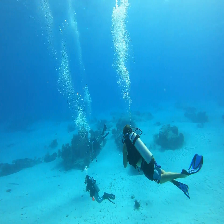

In [146]:
z_test[19]
z_test[128]
z_test[167]
z_test[178]
# z_test[284]
# z_test[293]
# z_test[298]
# z_test[441]

In [ ]:
data = test_dataset.take(1)

points, labels = list(data)[0]
points = points[:8, ...]
labels = labels[:8, ...]

# run test data through model
preds = model.predict(points)
preds = tf.math.argmax(preds, -1)

points = points.numpy()

# plot points with predicted class and label
fig = plt.figure(figsize=(15, 10))
for i in range(8):
    ax = fig.add_subplot(2, 4, i + 1, projection="3d")
    ax.scatter(points[i, :, 0], points[i, :, 1], points[i, :, 2])
    ax.set_title(
        "pred: {:} \n label: {:}".format(
            bin_map[preds[i].numpy()], bin_map[labels.numpy()[i]]
        )
    )
    ax.set_axis_off()
plt.show()

In [142]:
model3 = keras.Sequential()
 
# Add mobilenet base model
model3.add(model_vgg)
 
# Add new layers
model3.add(Flatten())
model3.add(Dense(1024, activation='relu'))
model3.add(Dropout(0.25))
model3.add(Dense(1, activation='sigmoid'))
 
# Show a summary of the model. Check the number of trainable parameters
model3.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1000)              138357544 
                                                                 
 flatten_5 (Flatten)         (None, 1000)              0         
                                                                 
 dense_10 (Dense)            (None, 1024)              1025024   
                                                                 
 dropout_5 (Dropout)         (None, 1024)              0         
                                                                 
 dense_11 (Dense)            (None, 1)                 1025      
                                                                 
Total params: 139,383,593
Trainable params: 5,123,049
Non-trainable params: 134,260,544
_________________________________________________________________


In [143]:
model3.compile(loss='binary_crossentropy',
              optimizer=Adam(lr=0.0001),
              metrics=['accuracy'])

/Users/kate/opt/anaconda3/envs/native_dl/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [108]:
y_train = np.array(y_train)
y_test = np.array(y_test)

In [144]:
y_train

array([0, 0, 0, ..., 1, 1, 1])

In [145]:
history = model3.fit(X_train, y_train,
                    epochs=10,
                    batch_size=64,
                    verbose=True,
                    validation_split=0.1)

Epoch 1/10


2022-03-25 00:56:46.380459: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


29/29 [==============================] - ETA: 0s - loss: 0.6524 - accuracy: 0.9508

2022-03-25 00:57:42.610313: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


29/29 [==============================] - 62s 2s/step - loss: 0.6524 - accuracy: 0.9508 - val_loss: 0.6531 - val_accuracy: 0.9510
Epoch 2/10
29/29 [==============================] - 47s 2s/step - loss: 0.6028 - accuracy: 0.9945 - val_loss: 0.6188 - val_accuracy: 0.9706
Epoch 3/10
29/29 [==============================] - 47s 2s/step - loss: 0.5554 - accuracy: 0.9967 - val_loss: 0.5827 - val_accuracy: 0.9706
Epoch 4/10
29/29 [==============================] - 48s 2s/step - loss: 0.5089 - accuracy: 0.9973 - val_loss: 0.5393 - val_accuracy: 0.9853
Epoch 5/10
29/29 [==============================] - 53s 2s/step - loss: 0.4629 - accuracy: 0.9978 - val_loss: 0.4990 - val_accuracy: 0.9804
Epoch 6/10
29/29 [==============================] - 77s 3s/step - loss: 0.4167 - accuracy: 0.9978 - val_loss: 0.4564 - val_accuracy: 0.9755
Epoch 7/10
29/29 [==============================] - 78s 3s/step - loss: 0.3721 - accuracy: 0.9984 - val_loss: 0.4190 - val_accuracy: 0.9706
Epoch 8/10
29/29 [=============

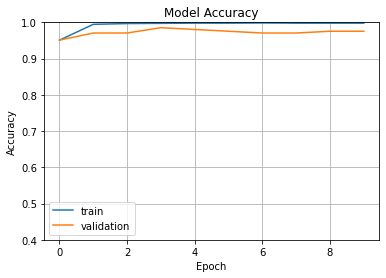

In [146]:
# fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'])
plt.show()

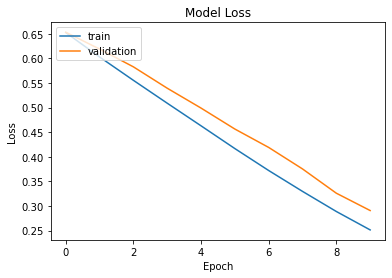

In [147]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [148]:
predictions = model3.predict(X_test)

2022-03-25 01:10:18.918844: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


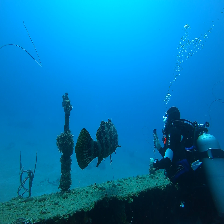

In [80]:
z_test[-1]

In [159]:
rounded_preds = np.round(predictions)
preds = rounded_preds.tolist()

def flatten(t):
    return [int(item) for sublist in t for item in sublist]

pred_list = flatten(rounded_preds.tolist())
# pred_list


In [151]:
model3.evaluate(x=X_test, y=y_test)

8/8 [==============================] - 5s 601ms/step - loss: 0.3679 - accuracy: 0.9115


[0.3679330050945282, 0.9115044474601746]

In [152]:
incorrect_preds = np.nonzero(pred_list != y_test)
list(incorrect_preds[0])

[47,
 93,
 98,
 99,
 107,
 123,
 129,
 137,
 145,
 150,
 157,
 158,
 167,
 177,
 179,
 185,
 202,
 207,
 213,
 214]

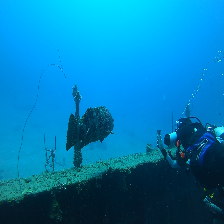

In [153]:
z_test[202]

In [154]:
precision = keras.metrics.Precision()
precision.update_state(y_test,pred_list)
precision.result().numpy()

0.99145305

In [155]:
acc = keras.metrics.Accuracy()
acc.update_state(y_test,pred_list)
acc.result().numpy()

0.91150445

In [156]:
recall = keras.metrics.Recall()
recall.update_state(y_test,pred_list)
recall.result().numpy()

0.85925925

In [157]:
recall_score(y_test,pred_list)

0.8592592592592593

In [158]:
f1_score(y_test,pred_list)

0.9206349206349208